In [53]:
# Loading all required libraries
import keras
from keras.models import Model
from keras.optimizers import Adadelta
from keras.layers import Input, Conv2D, MaxPool2D, UpSampling2D, Flatten, Dense
from keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from imgaug import augmenters

In [54]:
np.random.seed(100)

In [55]:
# load MNIST dataset
(x_train, y_traget), (x_test, y_target) = mnist.load_data()

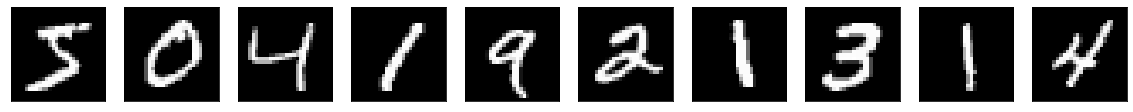

In [56]:
# Visualization of some digits
n = 10  
plt.figure(figsize = (20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

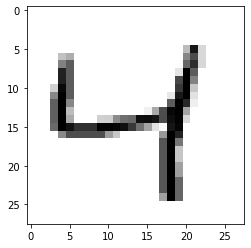

In [57]:
plt.imshow(x_train[2], cmap = plt.cm.binary)
plt.show()

In [58]:
# Generating Salt and Pepper Noise Filter
noise = augmenters.SaltAndPepper(0.1)
seq_obj = augmenters.Sequential([noise])

In [59]:
train_x_n = seq_obj.augment_images(x_train)
test_x_n = seq_obj.augment_images(x_test)

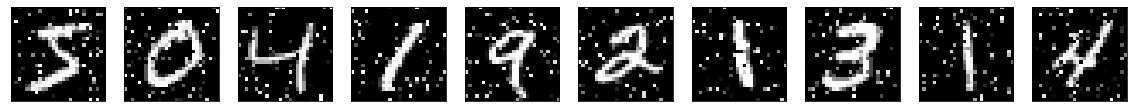

In [60]:
# Visualization of some digits
n = 10  
plt.figure(figsize = (20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(train_x_n[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

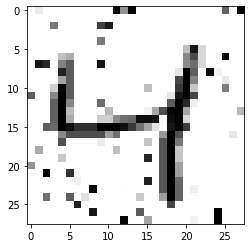

In [61]:
plt.imshow(train_x_n[2], cmap = plt.cm.binary)
plt.show()

In [62]:
# Normalizing the data
# reshape to (28, 28, 1) and normalize input images
image_size = x_train.shape[1]
# Original trian-test
x_train = np.reshape(x_train, [-1, image_size, image_size, 1])
x_test = np.reshape(x_test, [-1, image_size, image_size, 1])
# Noisy train-test
train_x_n = np.reshape(train_x_n, [-1, image_size, image_size, 1])
test_x_n = np.reshape(test_x_n, [-1, image_size, image_size, 1])

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
train_x_n = train_x_n.astype('float32') / 255
test_x_n = test_x_n.astype('float32') / 255

In [63]:
# Autoencoder Model
Input_img = Input(shape=(28, 28, 1))  

#encoding architecture
x1 = Conv2D(64, (3, 3), activation='relu', padding='same')(Input_img)
x1 = MaxPool2D( (2, 2), padding='same')(x1)
x2 = Conv2D(32, (3, 3), activation='relu', padding='same')(x1)
x2 = MaxPool2D( (2, 2), padding='same')(x2)
x3 = Conv2D(16, (3, 3), activation='relu', padding='same')(x2)
encoded    = MaxPool2D( (2, 2), padding='same')(x3)

# decoding architecture
x3 = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x3 = UpSampling2D((2, 2))(x3)
x2 = Conv2D(32, (3, 3), activation='relu', padding='same')(x3)
x2 = UpSampling2D((2, 2))(x2)
x1 = Conv2D(64, (3, 3), activation='relu')(x2)
x1 = UpSampling2D((2, 2))(x1)
decoded   = Conv2D(1, (3, 3), padding='same')(x1)

autoencoder = Model(Input_img, decoded)
autoencoder.summary()

Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 14, 14, 32)        18464     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 7, 7, 16)          4624      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 4, 4, 16)         

In [64]:
# Compile the Model
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [65]:
# Fit the Model
early_stopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')
a_e = autoencoder.fit(train_x_n, x_train,
            epochs=100,
            batch_size=32,
            shuffle=True,
            validation_data=(test_x_n, x_test),
            callbacks=[early_stopper])

Epoch 1/100
1875/1875 [==============================] - 12s 7ms/step - loss: 0.4876 - val_loss: 0.3333
Epoch 2/100
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2963 - val_loss: 0.2686
Epoch 3/100
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2590 - val_loss: 0.2547
Epoch 4/100
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2520 - val_loss: 0.2503
Epoch 5/100
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2488 - val_loss: 0.2473
Epoch 6/100
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2462 - val_loss: 0.2450
Epoch 7/100
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2442 - val_loss: 0.2433
Epoch 8/100
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2427 - val_loss: 0.2418
Epoch 9/100
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2410 - val_loss: 0.2402
Epoch 10/100
1875/1875 [==============================] - 12s 7m

1875/1875 [==============================] - 12s 7ms/step - loss: 0.1931 - val_loss: 0.1923
Epoch 80/100
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1929 - val_loss: 0.1921
Epoch 81/100
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1926 - val_loss: 0.1918
Epoch 82/100
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1924 - val_loss: 0.1916
Epoch 83/100
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1921 - val_loss: 0.1913
Epoch 84/100
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1919 - val_loss: 0.1912
Epoch 85/100
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1917 - val_loss: 0.1909
Epoch 86/100
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1914 - val_loss: 0.1907
Epoch 87/100
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1912 - val_loss: 0.1905
Epoch 88/100
1875/1875 [==============================] - 12s 7ms/st

In [66]:
# Predictions on Test data
predictions = autoencoder.predict(test_x_n)

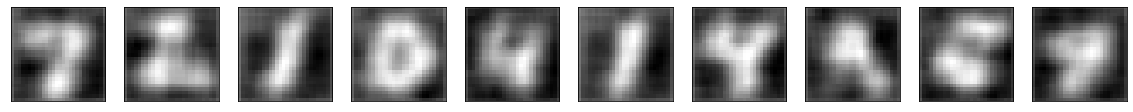

In [67]:
# Visualization of some digits
n = 10  
plt.figure(figsize = (20, 4))
for i in range(n):
    # display predicted
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(predictions[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

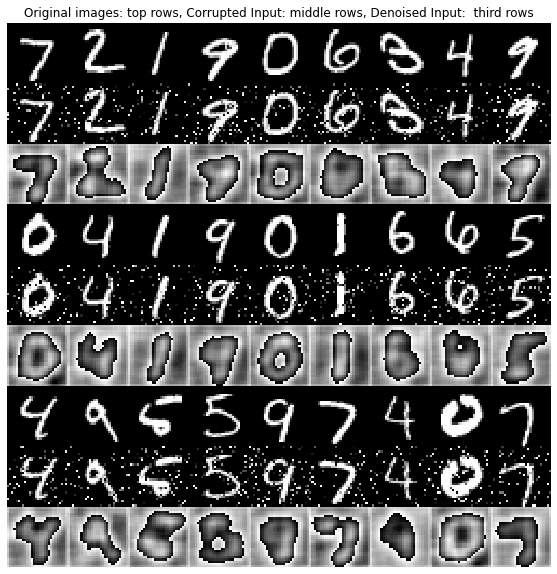

In [72]:
# 3 sets of images with 9 MNIST digits
# 1st rows - original images
# 2nd rows - images corrupted by noise
# 3rd rows - denoised images
rows, cols = 3, 9
num = rows * cols
imgs = np.concatenate([x_test[:num], test_x_n[:num], predictions[:num]])
imgs = imgs.reshape((rows * 3, cols, image_size, image_size))
imgs = np.vstack(np.split(imgs, rows, axis=1))
imgs = imgs.reshape((rows * 3, -1, image_size, image_size))
imgs = np.vstack([np.hstack(i) for i in imgs])
imgs = (imgs * 255).astype(np.uint8)
plt.figure(figsize = (10, 10))
plt.axis('off')
plt.title('Original images: top rows, '
          'Corrupted Input: middle rows, '
          'Denoised Input:  third rows')
plt.imshow(imgs, interpolation='none', cmap='gray')
Image.fromarray(imgs).save('corrupted_and_denoised.png')
plt.show()

In [73]:
autoencoder.save('autoencoder.h5')